# Author: Makayla McKibben
## Course: DSC530 Data Exploration and Analysis
## Exercise: 7.2
## Date: 10.12.2024

## Ex. 7-1

In [277]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import basename, exists
import math

In [278]:
# Get data
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

In [279]:
# Import relevant datasets and libraries
import nsfg
import first
import thinkstats2
import thinkplot
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [280]:
# Select all live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
live.head(18)

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5.0,NaN,3.0,5.0,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875
5,6,1,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
6,6,2,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,9.5625
7,6,3,NaN,NaN,NaN,NaN,6.0,NaN,1.0,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.3750
8,7,1,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
9,7,2,NaN,NaN,NaN,NaN,5.0,NaN,1.0,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,6.6250


In [281]:
# Check all column names
live.columns.tolist()

['caseid',
 'pregordr',
 'howpreg_n',
 'howpreg_p',
 'moscurrp',
 'nowprgdk',
 'pregend1',
 'pregend2',
 'nbrnaliv',
 'multbrth',
 'cmotpreg',
 'prgoutcome',
 'cmprgend',
 'flgdkmo1',
 'cmprgbeg',
 'ageatend',
 'hpageend',
 'gestasun_m',
 'gestasun_w',
 'wksgest',
 'mosgest',
 'dk1gest',
 'dk2gest',
 'dk3gest',
 'bpa_bdscheck1',
 'bpa_bdscheck2',
 'bpa_bdscheck3',
 'babysex',
 'birthwgt_lb',
 'birthwgt_oz',
 'lobthwgt',
 'babysex2',
 'birthwgt_lb2',
 'birthwgt_oz2',
 'lobthwgt2',
 'babysex3',
 'birthwgt_lb3',
 'birthwgt_oz3',
 'lobthwgt3',
 'cmbabdob',
 'kidage',
 'hpagelb',
 'birthplc',
 'paybirth1',
 'paybirth2',
 'paybirth3',
 'knewpreg',
 'trimestr',
 'ltrimest',
 'priorsmk',
 'postsmks',
 'npostsmk',
 'getprena',
 'bgnprena',
 'pnctrim',
 'lpnctri',
 'workpreg',
 'workborn',
 'didwork',
 'matweeks',
 'weeksdk',
 'matleave',
 'matchfound',
 'livehere',
 'alivenow',
 'cmkidied',
 'cmkidlft',
 'lastage',
 'wherenow',
 'legagree',
 'parenend',
 'anynurse',
 'fedsolid',
 'frsteatd_n',


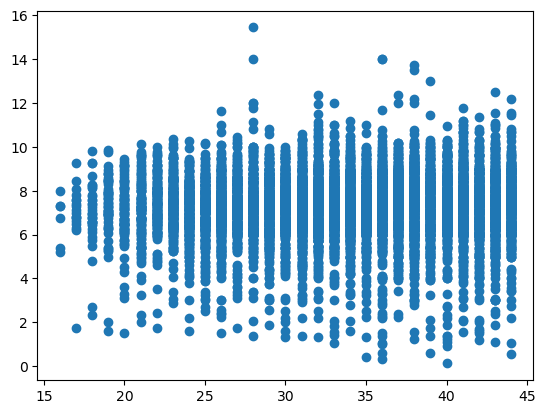

In [282]:
# Plot age vs. baby weight
plt.scatter(live['ager'], live['totalwgt_lb'])

In [283]:

bins = np.arange(15, 45, 4)
mom_age = np.digitize(live.ager, bins)

In [284]:
groups = live.groupby(mom_age)

In [285]:
age = [group.ager.mean() for i, group in groups]

In [286]:
cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

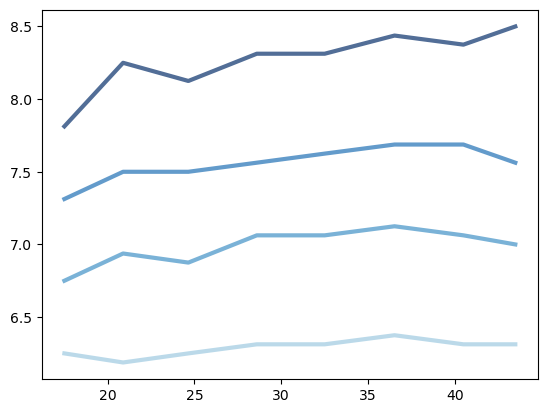

In [287]:
for percent in [80, 60, 40, 20]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    thinkplot.Plot(age, weights)

In [288]:
# Make new df with desired columns and drop entire row if one column has NaN
weight_age_df = pd.DataFrame(live[['ager', 'totalwgt_lb']])
weight_age_df.dropna(how = 'any', inplace = True)

In [289]:
# Calculate and display Pearson's correlation
pearson = thinkstats2.Corr(weight_age_df['ager'], weight_age_df['totalwgt_lb'])
pearson

0.04004563293060176

In [290]:
# Calculate and display Spearman's rank 
spearman = thinkstats2.SpearmanCorr(weight_age_df['ager'], weight_age_df['totalwgt_lb'])
spearman

0.04205869148214856

There is a very slight positive correlation between the age of the mother and weight of the baby. There is agreement between Spearman's and Pearson's coefficients which tells us the relationship is likely linear.

## 8-1

In this chapter we used mean and median to estimate mu and found that mean yields lower Mean Squared Error.
Also we used S2 and S2n-1 to estimate rowe and found that S2 is biased and S2n-1 is unbiased.

Run similar experiments to see if mean and median are biased estimates of mu. Also check whether S2 or S2n-1 yields a lower mean squared error.

In [294]:
# Setup game
def Estimate(n, m):
    # Set constants/empty lists
    mu = 0
    sigma = 1
    means = []
    estimates = []
    # Iterate through m number of times
    for _ in range(m):
        # Get random datapoints in range
        xs = [thinkstats2.random.gauss(mu, sigma) for i in range(n)]
        # Calculate mean
        xbar = np.mean(xs)
        # Append mean to list
        estimates.append(xbar)
    # Find errors    
    errors = [estimate - mu for estimate in estimates]
    return np.mean(errors)

In [295]:
# Run Estimate with 8 iterations of 10000 points
Estimate(8, 10000)

-0.0010430136329961017

In [296]:
# Run Estimate with 8 iterations of 100000 points
Estimate(8, 100000)

0.002656901374001671

Sample mean is not a biased estimator of mu.


In [298]:
# Define func that takes number of trials and number of points
def Estimate2(n, m):
    # Set variables and empty list
    mu = 0
    sigma = 1
    medians = []
    estimates = []
    # Iterate through points
    for _ in range(m):
        # Get random datapoints in range
        xs = [thinkstats2.random.gauss(mu, sigma) for i in range(n)]
        # Find median
        median = np.median(xs)
        # Append to list
        estimates.append(median)
    # Find errors
    errors = [estimate - mu for estimate in estimates]
    return np.mean(errors)

In [299]:
Estimate2(8, 10000)

0.001416823472808194

In [300]:
Estimate2(10, 1000000)

-5.682871128358723e-05

Median is not biased for mu either.

In [302]:
# Define function that takes n trials and m points
def Estimate3(n, m):
    # Set constants and empty list
    mu = 0
    sigma = 1
    estimates = []
    # Iterate through num of points
    for _ in range(m):
        # Find random points in range
        xs = [thinkstats2.random.gauss(mu, sigma) for i in range(n)]
        # Find variance
        s2 = np.var(xs)
        # Append variance to list
        estimates.append(s2)
    # Find errors
    e2 = [(estimate - 1)**2 for estimate in estimates]
    # Find mean squared error
    mse = np.mean(e2)
    return mse

In [303]:
# Find mse of 8 trials with 10000 points
Estimate3(8, 10000)

0.23611002702091569

In [304]:
# Define function that takes n trials and m points
def Estimate4(n, m):
    # Define variables and empty list
    mu = 0
    sigma = 1
    estimates = []
    # Iterate through points
    for _ in range(m):
        # Find random values
        xs = [thinkstats2.random.gauss(mu, sigma) for i in range(n)]
        # Find
        s2n1 = np.var(xs, ddof = 1)
        estimates.append(s2n1)
    e2 = [(estimate - 1)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse

In [305]:
# Check mse of S^2 n-1
Estimate4(8, 10000)

0.28386656289891815

S2 minimizes MSE.

## 8-2

Suppose that you draw a sample with size n = 10 from an exponential distribution with lambda = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval. 

Repeat the experiment with a few different values of n and make a plot of standard error vs. n.

In [309]:
# Define functions that takes n trials with m points
def Estimate5(n, m):
    # Define constant and empty lists
    lam = 2
    means = []
    medians = []
    # Iterate through num points
    for _ in range(m):
        # Find random points
        xs = np.random.exponential(1.0/lam, n)
        # Calculate L, an estimator of lambda 'lam'
        L = 1 / np.mean(xs)
        # Append to list
        means.append(L)
    # Plot values as histogram
    plt.hist(means, bins = 88)

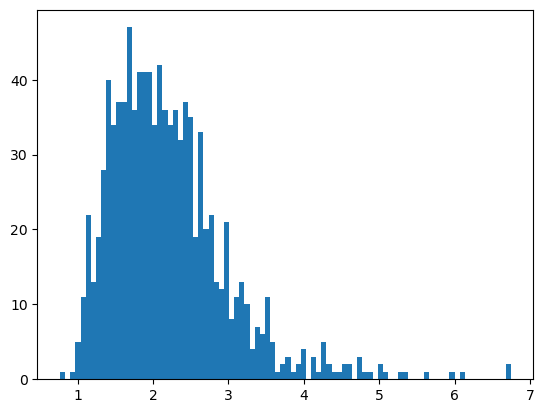

In [310]:
# Plot of ten tries of a thousand points each
Estimate5(10, 1000)

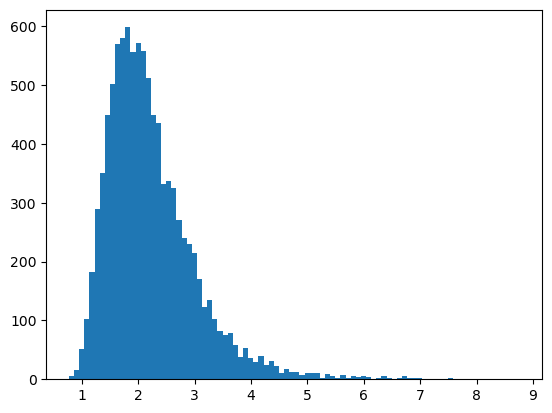

In [311]:
# Plot of ten tries of ten-thousand points each
Estimate5(10, 10000)

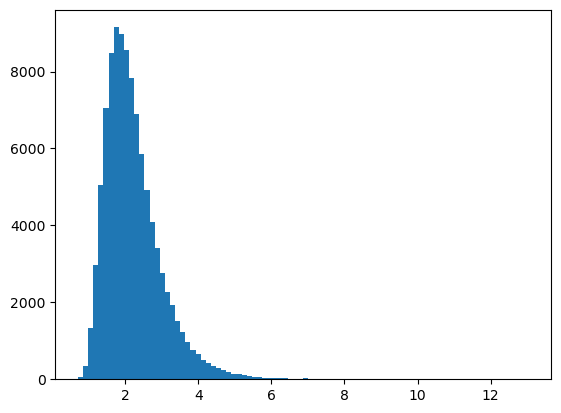

In [312]:
# Plot of ten tries of a hundred-thousand points each
Estimate5(10, 100000)

In [313]:
# Define function that does n trials with m points
def Estimate6(n, m):
    # Define lambda and empty lists
    lam = 2
    means = []
    medians = []
    # Iterate through points m
    for _ in range(m):
        # Get random values
        xs = np.random.exponential(1.0/lam, n)
        # Find L, an estimator of lambda
        L = 1 / np.mean(xs)
        # Append L to list
        means.append(L)
    # Make cdf of means
    cdf = thinkstats2.MakeCdfFromList(means)
    # Return cdf of means
    return cdf

In [314]:
# Find cdf of 10 trials of 1000 points
cdf = Estimate6(10, 1000)
cdf

Cdf([0.85963706 0.91605206 0.91648201 0.9164827  0.96621201 0.98072932
 1.01949392 1.02346329 1.03200835 1.03498215 1.0563862  1.05766458
 1.06220921 1.0668533  1.0887914  1.09524992 1.09661645 1.10008087
 1.10774745 1.10856346 1.11113284 1.12543304 1.12648744 1.12667244
 1.1272238  1.12726872 1.13214921 1.13941245 1.14356122 1.16932171
 1.1732768  1.17661192 1.17703368 1.18467626 1.18507549 1.18602859
 1.18901075 1.19096258 1.19431968 1.19683966 1.21489485 1.21595734
 1.22589783 1.22612855 1.22755935 1.23240369 1.23750111 1.24077208
 1.24786152 1.24800275 1.24854831 1.25949732 1.2608284  1.26580015
 1.26666929 1.26723795 1.28119223 1.28648574 1.28722121 1.29042754
 1.29313096 1.29317417 1.29384975 1.29391108 1.29728574 1.29745926
 1.30028068 1.30315972 1.30329177 1.30403286 1.30432085 1.30664521
 1.30727536 1.31225919 1.31918855 1.32112106 1.32179519 1.32499255
 1.32524429 1.32926391 1.32934926 1.33061983 1.33103774 1.33389407
 1.33568922 1.33766162 1.34159152 1.34281052 1.35034841 1.

In [315]:
# Find 90% confidence interval
conf_int = cdf.Percentile(5), cdf.Percentile(95)
conf_int

(1.2480027504282885, 3.613314666020738)

In [316]:
# Define function of n trials and m points
def Estimate6(n, m):
    # Define variable and empty lists
    lam = 2
    means = []
    medians = []
    # Iterate through m points
    for _ in range(m):
        # Find random points
        xs = np.random.exponential(1.0/lam, n)
        # Find L, estimator of lambda
        L = 1 / np.mean(xs)
        # Find mean
        means.append(L)
    # Find mean squared error
    e2 = [(mean - lam)**2 for mean in means]
    mse = np.mean(e2)
    # Return standard error
    return math.sqrt(mse)

In [317]:
n8 = Estimate6(8, 1000)
n18 = Estimate6(18, 1000)
n28 = Estimate6(28, 1000)
n38 = Estimate6(38, 1000)
n48 = Estimate6(48, 1000)
n58 = Estimate6(58, 1000)
n68 = Estimate6(68, 1000)
n78 = Estimate6(78, 1000)
n88 = Estimate6(88, 1000)

In [318]:
# Make array of number of trials
ns = [8, 18, 28, 38, 48, 58, 68, 78, 88]

In [319]:
# Make array of standard errors
stderrors = [n8, n18, n28, n38, n48, n58, n68, n78, n88]

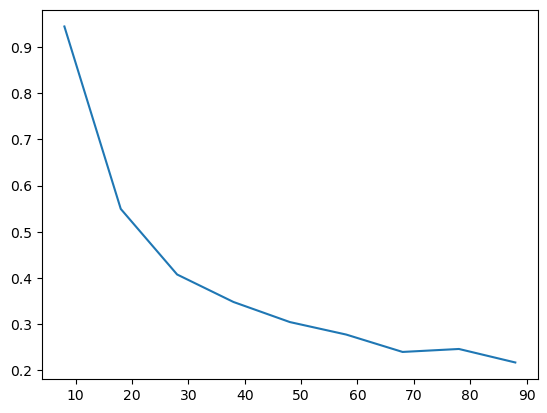

In [320]:
# Plot stderrors vs number of trials
plt.plot(ns, stderrors)

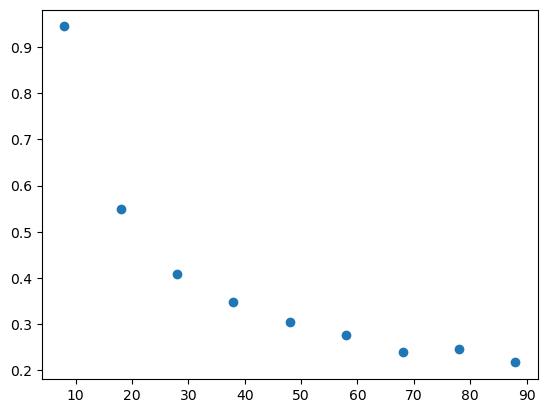

In [321]:
# Plot stderrors vs number of trials
plt.scatter(ns, stderrors)